# Kuantum Devre Oluşumu ve Çizimi İçin Gerekli Modüller

In [1]:
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit, Aer, execute, BasicAer
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_qsphere,plot_bloch_multivector
q=QuantumRegister(1)
c=ClassicalRegister(1)
circuit=QuantumCircuit(q,c)

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Y}{ \mymatrix{cc}{0 & i \\ -i & 0}  } $
$ \newcommand{\S}{ \mymatrix{cc}{1 & 0 \\ 0 & i}  } $
$ \newcommand{\T}{ \mymatrix{cc}{1 & 0 \\ 0 & e**(pi/4)}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\CZ}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1} } $
$ \newcommand{\SWAP}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

# Kübit

 $ \ket{0} = \myvector{1 \\ 0} $ , $ \ket{1} = \myvector{0 \\ 1} $

# Tek Kübite Etki Eden Kapılar

X Kapısı = $\X$          Y Kapısı = $\Y$ 
Z Kapısı = $\Z$ S Kapısı = $\S$
T Kapısı = $\T$ Hadamard = $\hadamard$

In [3]:
circuit.x(q[1])
circuit.measure(q,c)
#Siyah-Beyaz yazdırmak için
circuit.draw()

IndexError: list index out of range

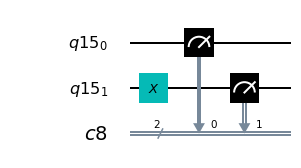

In [48]:
#Renkli bir şekilde yazdırmak için
circuit.draw(output='mpl')

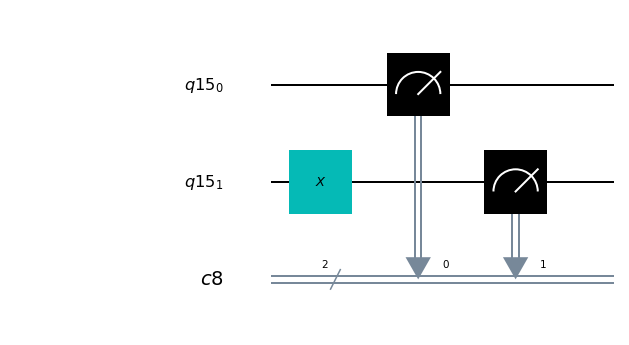

In [49]:
#Daha büyük bir görüntü elde etmek için
circuit.draw(output='mpl',scale=1.5)

In [50]:
#Programı 1000 kez çalıştırmak için
job = execute(circuit,Aer.get_backend('qasm_simulator'),shots=1000)
# print the results
counts = job.result().get_counts(circuit)
print(counts)

{'10': 1000}


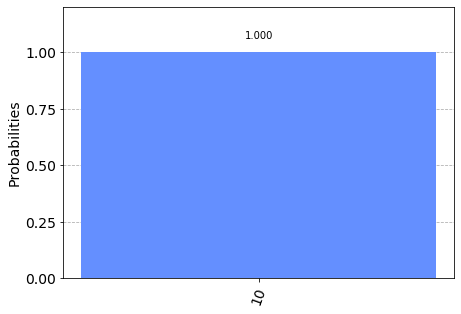

In [51]:
#Histogram Bar Grafiğinde Göstermek İçin
plot_histogram(counts)

In [52]:
#Statevektör olarak çalıştırmak için
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(circuit, backend).result()
psi  = result.get_statevector(circuit)

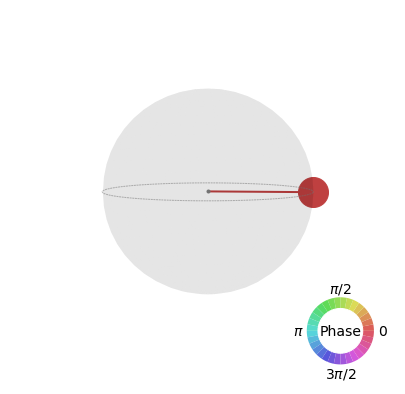

In [53]:
plot_state_qsphere(psi)

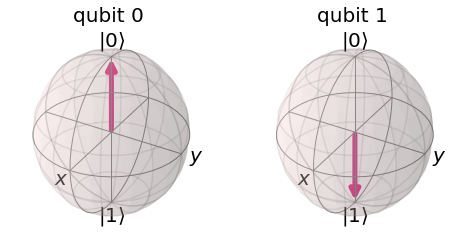

In [54]:
plot_bloch_multivector(psi)

# İki Kübite Etki Eden Kapılar

CNot Kapısı = $\CNOT$
CZ Kapısı = $\CZ$
SWAP Kapısı = $\SWAP$

In [ ]:
q1=QuantumRegister(2)
c1=ClassicalRegister(2)
circuit0=QuantumCircuit(q1,c1)

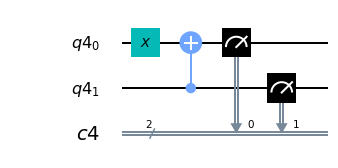

In [7]:
circuit0.x(q1[0])
circuit0.cx(q1[1],q1[0])
circuit0.measure(q1,c1)
circuit0.draw(output='mpl')

In [9]:
# execute the program 1000 times
job = execute(circuit0,Aer.get_backend('qasm_simulator'),shots=1000)
# print the results
counts = job.result().get_counts(circuit0)
print(counts)

{'01': 1000}


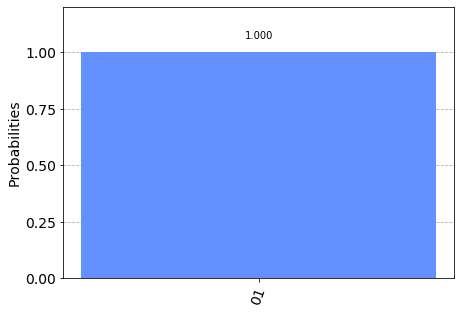

In [10]:
plot_histogram(counts)

# Dolanıklık

<li>A ve B gibi iki durum düşünüldüğünde bu iki durumun bazı özellikleri birbiriyle ilişkili ise ve bu ilişki A ve B durumları sonsuz uzaklıkta dahi olsa geçerli ise A ve B birbiriyle dolanıktır demektir.
<li>Dolanıklık fikri 1930'lu yıllarda Einstein,Podolsky ve Roseun isimli bilim insanları tarafından ortaya atılmıştır. Daha sonra Bell isimli bilim insanı tarafından da ikili sistemlerin dolanıklığı deneysel olarak ispatlanmıştır.
<li>Günümüzde kuantum teknolojilerinin en büyük başarılarından birisi dolanık olmayan sistemleri kuantum kapılar yardımıyla dolanık hale getirmesidir.


# İkili Sistemlerde Dolanıklık Oluşturulması ve Bell Durumları

<li>Kuantum teknolojilerde dolanık olmayan sistemler Hadamard ve CNot kapıları yardımıyla dolanık hale getirilmektedir.

 $ \ket{00}  $ durumunu dolanık hale getirelim

<li>CNot ( Hadamard (|00⟩))

<li> CNOT( $ {\dfrac{ \ket{0} + \ket{1} }{\sqrt{2}}} $ $\bigotimes$ $\ket{0} $)

<li> CNOT($ {\dfrac{ \ket{00} + \ket{10} }{\sqrt{2}}} $)

<li> $ {\dfrac{ \ket{00} + \ket{11} }{\sqrt{2}}} $ = $ \ket{B00}$

In [29]:
qc=QuantumRegister(2)
cc=ClassicalRegister(2)
circuit2=QuantumCircuit(qc,cc)

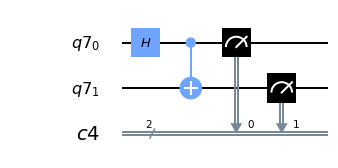

In [30]:
circuit2.h(qc[0])
circuit2.cx(qc[0],qc[1])
circuit2.measure(qc,cc)
circuit2.draw(output='mpl')

In [31]:
# execute the program 1000 times
job = execute(circuit2,Aer.get_backend('qasm_simulator'),shots=1000)
# print the results
counts = job.result().get_counts(circuit2)
print(counts)

{'11': 522, '00': 478}


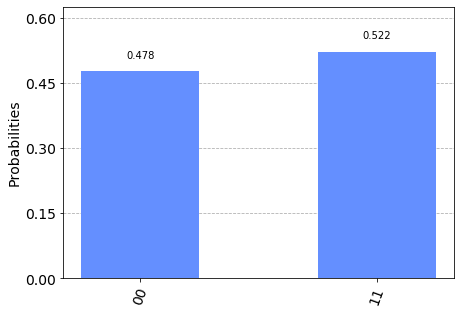

In [32]:
plot_histogram(counts)

# Sıra Sizde

<li> $\ket{11}$ durumunu dolanık hale getiriniz

In [54]:
#Çözümü buraya yapabilirsiniz.

# Teleportasyon

Teleportasyon, bilinmeyen bir kuantum durumu dolanık iki sistem arasında birinden diğerine anlık olarak gönderilmesidir.Bu durum kuantum teknolojilerde aşağıdaki gibi gerçekleştirilir.

Alice ve Bob gibi iki kişinin olduğunu varsayalım. Öncelikle bunlardan biri dolanık bir durum oluştursun. Örneğin Alice $ \ket{00}  $ durumuyla dolanıklık oluştursun.

<li>CNot ( Hadamard (|00⟩))

<li> CNOT( $ {\dfrac{ \ket{0} + \ket{1} }{\sqrt{2}}} $ $\bigotimes$ $\ket{0} $)

<li> CNOT($ {\dfrac{ \ket{00} + \ket{10} }{\sqrt{2}}} $)

<li> $ {\dfrac{ \ket{00} + \ket{11} }{\sqrt{2}}} $ 

Alice bu durumu Bob ile paylaşsın. Bu durumda Alice bilinmeyen $\ket{\Psi}$ =$\alpha$$ \ket{0}$ + $\beta$$ \ket{1}$ durumunu Bob'a göndermek istesin.

<li>($\alpha$$ \ket{0}$ + $\beta$$ \ket{1}$) $\bigotimes$ $ {\dfrac{ \ket{00} + \ket{11} }{\sqrt{2}}} $

$\ket{\Psi'}$=${\dfrac{\alpha \ket{000}+\alpha \ket{011}+\beta\ket{100}+\beta\ket{111}}{\sqrt{2}}}$ 
Alice ve Bob durumu oluşturdu ve paylaştı

Alice elindeki duruma sırasıyla CNOT ve Hadamard kapısı uygular.


$\ket{\Psi''}$=CNOT$\ket{\Psi'}$=${\dfrac{\alpha CNOT \ket{000}+\alpha CNOT \ket{011}+\beta CNOT\ket{100}+\beta CNOT\ket{111}}{\sqrt{2}}}$ 

$\ket{\Psi''}$=${\dfrac{\alpha \ket{000}+\alpha \ket{011}+\beta\ket{110}+\beta\ket{101}}{\sqrt{2}}}$ 

$\ket{\Psi'''}$=H($\ket{\Psi''}$)=${\dfrac{\alpha H \ket{000}+\alpha H \ket{011}+\beta H \ket{110}+\beta H\ket{101}}{\sqrt{2}}}$ 

$\ket{\Psi'''}$=$ {\dfrac{({  \alpha {\dfrac{ \ket{0} + \ket{1} }{\sqrt{2}}}\bigotimes}  \ket{00}) + ({  \alpha {\dfrac{ \ket{0} + \ket{1} }{\sqrt{2}}}\bigotimes}  \ket{11}) + ({  \beta {\dfrac{ \ket{0} - \ket{1} }{\sqrt{2}}}\bigotimes}  \ket{10}) +  ({  \beta {\dfrac{ \ket{0} - \ket{1} }{\sqrt{2}}}\bigotimes}  \ket{01})}{\sqrt{2}}} $ 


Alice $\ket{\Psi'''}$ durumunda ölçüm yapar ve ölçüm durumunda 00,01,10 ve 11 durumlarından bir tanesini elde eder. Elde edilen ölçüm sonucunu Bob'a herhangi bir yolla bildirerek Bob o sonuca göre kapı uygulayarak $\ket{\Psi}$ durumunu elde eder.

Son ifadede ki $\ket{\Psi'''}$ duruma Alice ölçüm sonuçlarına göre aşağıdaki düzenlenebilir

$\ket{\Psi'''}$= $\onehalf$($ \ket{00}  $($\alpha$$ \ket{0}$ + $\beta$$ \ket{1}$)+$ \ket{01}  $($\alpha$$ \ket{1}$ + $\beta$$ \ket{0}$) + $ \ket{10}  $($\alpha$$ \ket{0}$ - $\beta$$ \ket{1}$) + $ \ket{11}  $($\alpha$$ \ket{1}$ - $\beta$$ \ket{0}$))

Yukarıda da görüldüğü gibi Alice'in ölçüm sonucuna göre Bob'un eline giden $\ket{\Psi}$ değişecektir. Bu nedenle Alice ölçüm sonucunu Bob'a söyleyerek Bob'da bu ölçüm sonucuna göre uygulaması gereken kapıyı uygulayacaktır.

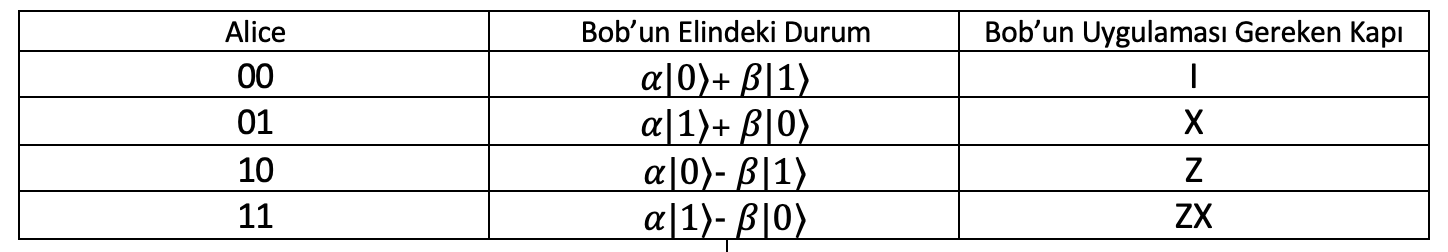

In [24]:
from qiskit import *

In [25]:
circuit = QuantumCircuit(3,3)
# Kübit düzenlenme
# q0 = durum |psi> teleport etmek istediğimiz durum
# q1 = Alice, Bell çiftinin yarısı
# q2 = Bob, tereleport edilecek olan Bell çiftinin yarısı.

# ========================
# Adım 0: Kübit q0'da tereleport edilecek durumu oluşturma
circuit.x(0) # qubit 0 artık |1> durumunda ve bu teleport etmek istediğimiz durum

circuit.barrier() 
# ========================
# Adım 1: Alice ve Bob arasında dolanık bir Bell çifti oluşturma(1 ve 2 numaralı kübitler)
circuit.h(1)
circuit.cx(1,2)

circuit.barrier() 
# ========================
# Adım 2: Alice bir dizi işlemi teleport edilecek durum (0 kübit) ve Bell çiftinin yarısı (kübit 1) arasında uygular
 
circuit.cx(0,1)
circuit.h(0)

circuit.barrier() 
# ========================
# Adım 3: Alice hem 0 hem de 1 kübitlerini ölçer.
circuit.measure([0, 1], [0, 1]) # ölçüm sonucu sırasıyla 0 ve 1 klasik bitlerinde saklanır.

circuit.barrier() 
# ========================
# # Adım 4: Alice artık iki kübiti ölçtüğüne göre durumları 0 ve 1'e düştü.
# Bob, Bell çiftinin yarısına kadar bu kübitlere koşullu kapılar uygulayabilir.
# Bob 0 ve 1 kübitleri üzerinde ölçüm sonuçlarına göre klasik bilgiyi klasik 0 ve 1 bitlerinde
#ileterek uzun mesafelerde teleportasyon yapılabilir durumda.
circuit.cx(1, 2)
circuit.cz(0, 2)

# 5. Adım:  Hangi durumda olduğunu bulmak için Bob kübitinde ölçüm yapar.
circuit.measure([2], [2])

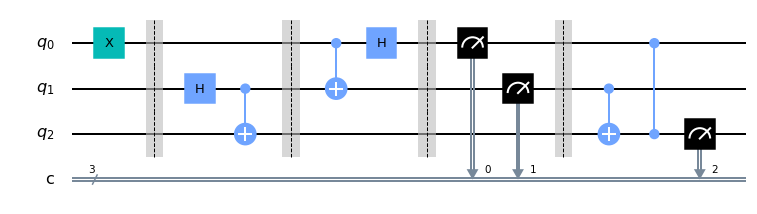

In [26]:
%matplotlib inline
circuit.draw(output='mpl')

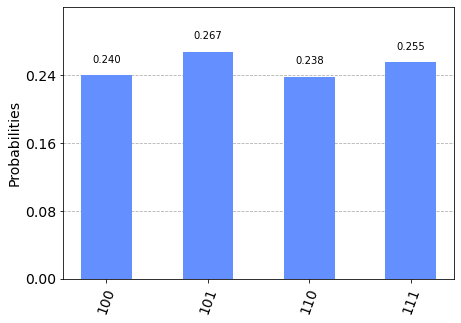

In [27]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [28]:
# Teleport etmek istediğimiz durum |1> olduğundan ölçüm sonuçlarında ilk bit tüm histogramlarda 1'dir

# Süper Yoğun Kodlama

<li>Kuantum teleportasyonda bilinmeyen bir kuantum durum bir yerden başka bir yere anlık olarak gönderilirken süper yoğun kodlamada ise 2 bitlik klasik bir bilgi bir kuantum kübit(dolanık) yardımıyla bir yerden başka bir yere anlık olarak gönderilebilmektedir.

<li>Süperyoğun kodlama algoritması aşağıdaki şekilde gerçekleştirilir.

<li>Alice ve Bon öncelikle 4 Bell durumundan herhangi birini paylaşırlar. Alice 2 bitlik 00,01,10,11 bilgilerinden birini göndermek istesin. Bu bilgilere karşılık $ \ket{B00}$,$ \ket{B01}$,$ \ket{B10}$,$ \ket{B11}$ durumlarını denk sayar ve göndereceği bilgilere göre Alice aşağıdaki kapıları uygular.

Alice ve Bob $ \ket{00}  $ durumuna sahip olsun. Alice bu duruma Hadamard ve CNOT kapısı uygulayarak dolanık hale getirir.

<li>CNot ( Hadamard (|00⟩))

<li> CNOT( $ {\dfrac{ \ket{0} + \ket{1} }{\sqrt{2}}} $ $\bigotimes$ $\ket{0} $)

<li> CNOT($ {\dfrac{ \ket{00} + \ket{10} }{\sqrt{2}}} $)

<li> $ {\dfrac{ \ket{00} + \ket{11} }{\sqrt{2}}} $ 

Bu dolanık durum herhangi bir kanalla Bob ile paylaşılır ve Alice göndereceği 2'li bitlere göre aşağıdaki kapıları uygular.

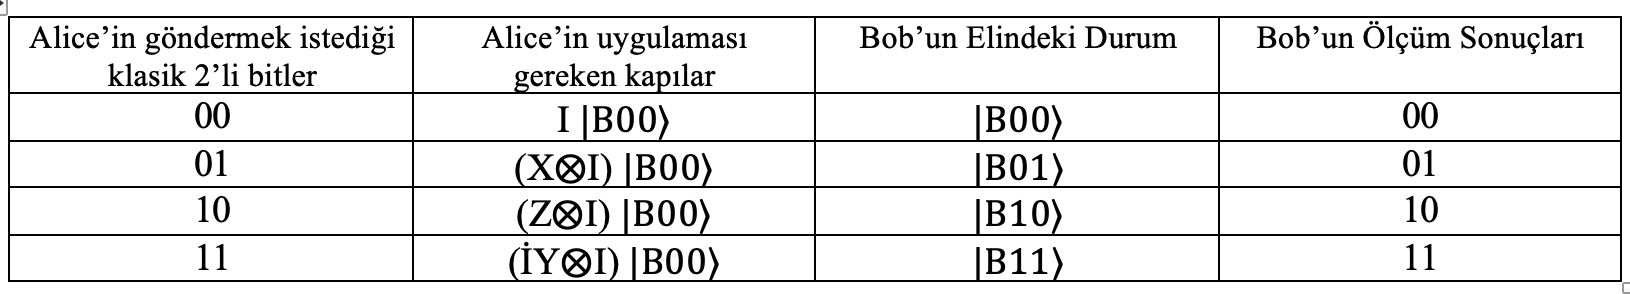

# Kaynaklar

# [1] M. Nielsen and I. Chuang, Quantum Computation and Quantum Information, Cambridge Series on Information and the Natural Sciences (Cambridge University Press, Cambridge, 2000).

# [2] https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/Coding_With_Qiskit/ep5_Quantum_Teleportation.ipynb